[View in Colaboratory](https://colab.research.google.com/github/jyeeee95/tutorial/blob/master/180719_plotnine.ipynb)

# 국민청원 데이터 시각화와 자연어처리
[ 18-07-19 배로쌤 ]






## 수업 방향
지난 수업에 이어 국민 청원 데이터 중 본인이 원하는 주제의 키워드의 청원을 따로 뽑아 실습을 진행한다. 오늘은 plotnine, pandas, numpy, matplotlib 등을 통해 데이터를 다양한 모양의 그래프로 시각화 해 본다.

### [A Grammar of Graphics for Python — plotnine](http://plotnine.readthedocs.io/en/stable/index.html)
* [tutorial](http://plotnine.readthedocs.io/en/stable/tutorials.html)
* [ggplot2-cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)

## 라이브러리 import
필요한 라이브러리를 설치하고 임포트 해 준다.

In [0]:
!pip install -q 'plotnine[all]'

In [178]:
!pip show plotnine

Name: plotnine
Version: 0.3.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: Hassan Kibirige
Author-email: has2k1@gmail.com
License: GPL-2
Location: /usr/local/lib/python3.6/dist-packages
Requires: six, statsmodels, scipy, numpy, matplotlib, patsy, mizani, pandas
Required-by: 


In [3]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

0.22.0
1.14.5


In [5]:
# 불필요한 warnings을 찍지 않기 위해 import 해왔습니다. 
# import warnings
# warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

from plotnine import *
import plotnine

## 국민청원 데이터 읽어오기

크롤링 된 국민청원 데이터를 판다스로 읽어와, 본인이 관심있는 분야의 청원에 대해 알아본다. tutorial 내에서는 ***2018 평창 동계 올림픽***과 관련된 7개의 키워드로 청원 데이터를 뽑아 낸다.


*키워드 : 평창, 평창동계올림픽, 평창올림픽, 올림픽, 패럴림픽, 수호랑, 반다비*

In [32]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', 
                 parse_dates=['start', 'end'])

# 데이터의 크기가 어느정도인지 본다.
df.shape

(211690, 8)

In [147]:
# 전체 데이터로 보면 너무 느리기 때문에 본인의 관심사에 맞는 데이터를 가져옵니다.
pc2018 = df.loc[(df.title.str.contains('평창|평창동계올림픽|평창올림픽|올림픽|패럴림픽|수호랑|반다비', regex=True)) & \
           (df.content.str.contains('평창|평창동계올림픽|평창올림픽|올림픽|패럴림픽|수호랑|반다비', regex=True))] 
pc2018.shape

(2128, 8)

국민 청원 데이터 중 총 2128개가 평창 동계 올림픽과 관련된 청원이었음을 알 수 있다.


*(참고) 여기서 원하는 키워드 간에 and 효과를 주고 싶다면 google에 `regex and`를 검색해주세요.*

### 국민청원 데이터 알아보기
데이터 `pc2018`에 들어있는 청원 내용을 확인해보자.

앞에서부터 3개의 데이터와 뒤에서부터 3개의 데이터를 불러내보자.

In [179]:
pc2018.head(3)

,article_id,start,end,answered,votes,category,title,content,start_year,start_month,start_day,start_hour,start_dow,start_wdn,start_dayofweek,start_dayofweek_kr
458,486,2017-08-25,2017-11-23,0,2,문화/예술/체육/언론,🇰🇷평창동계올림픽 초청 무대로 한국 최초로 바디락2016에서 우승한 Just jer...,안녕하세요 평창 동계올림픽에 관심이 많은 학생입니다.\n평창 동계올림픽에 just ...,2017,8,25,0,4,Friday,Fri,금
492,520,2017-08-25,2017-09-01,0,0,일자리,교육행정 개선을 통한 미국 의회 보고서 고구려 역사왜곡 시정과 양질의 일자리 창출 ...,지난 한국 정부의 교육 행정 기관의 자료를 토대로 작성한 보고서이나 미국 의회와 대...,2017,8,25,0,4,Friday,Fri,금
512,540,2017-08-25,2017-09-01,0,0,일자리,후속-교육행정개선을 통한 미국 의회 보고서 고구려 역사왜곡 시정과 양질의 일자리 창...,단군조선을 계승한 고구려는 천년 이상의 기간 동안 동북아에서 중국의 가장 강력한 라...,2017,8,25,0,4,Friday,Fri,금


In [180]:
pc2018.tail(3)

,article_id,start,end,answered,votes,category,title,content,start_year,start_month,start_day,start_hour,start_dow,start_wdn,start_dayofweek,start_dayofweek_kr
208096,268940,2018-06-12,2018-07-12,0,57,인권/성평등,"프로선수들의 아시안게임, 올림픽 국가대표 출전시 병역면제 혜택을 폐지 바랍니다.","프로선수들의 아시안게임, 올림픽 국가대표 출전시 병역면제 혜택을 폐지 바랍니다.\n...",2018,6,12,0,1,Tuesday,Tues,화
208270,269148,2018-06-12,2018-07-12,0,21,문화/예술/체육/언론,"올림픽, 아시안게임 병역혜택 폐지원합니다","올림픽, 아시안게임에 걸려있는 병역혜택제도 폐지가 시급합니다...\n군대는 당연히 ...",2018,6,12,0,1,Tuesday,Tues,화
209616,270812,2018-06-14,2018-07-14,0,0,미래,"남,북이 화합하고 더 좋은 미래를 위해 세계적인 스포츠 월드컵 또한 올림픽을 개최할...",안녕하세요.\n6/13 투표 결과 진심으로 축하드립니다.\n항상 초심 자세로 민심을...,2018,6,14,0,3,Thursday,Thurs,목


`pc2018`의 각 칼럼 속 데이터의 형태를 `info()`를 활용해 확인해본다.

In [150]:
pc2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 458 to 209616
Data columns (total 8 columns):
article_id    2128 non-null int64
start         2128 non-null datetime64[ns]
end           2128 non-null datetime64[ns]
answered      2128 non-null int64
votes         2128 non-null int64
category      2128 non-null object
title         2128 non-null object
content       2128 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 149.6+ KB


### 기초통계량 알아보기
`pc2018` 데이터의 기초통계량을 describe()를 활용해 알아본다. 옵션을 넣지 않았기 때문에 수치형 데이터의 통계량만 확인할 수 있다.

In [151]:
pc2018.describe()

,article_id,answered,votes
count,2128.000000,2128.000000,2128.000000
mean,117876.428102,0.000470,223.020677
std,31866.079572,0.021678,7842.896557
min,486.000000,0.000000,0.000000
25%,102074.000000,0.000000,2.000000
50%,113051.000000,0.000000,6.000000
75%,136104.000000,0.000000,15.000000
max,270812.000000,1.000000,360905.000000


문자열 데이터의 통계량을 확인하기 위해 `include=np.object`를 추가해본다.

In [152]:
pc2018.describe(include=np.object)

,category,title,content
count,2128,2128,2128
unique,17,2011,2080
top,문화/예술/체육/언론,나경원 의원 평창올림픽 위원직을 파면시켜주세요,나경원 의원 평창올림픽 위원직을 파면시켜주세요
freq,1050,33,16


`pc2018`은 **문화/예술/체육/언론** 분야에 데이터의 반이 몰려있으며, **나경원 의원 평창올림픽 위원직을 파면시켜주세요**라는 제목의 청원이 33건으로 가장 많이 올라왔음을 알 수 있다.

## 시계열 데이터 보기
`pc2018`을 시간과 관련하여 시각화 해본다.

In [153]:
pc2018['start_year'] = pc2018['start'].dt.year
pc2018['start_month'] = pc2018['start'].dt.month
pc2018['start_day'] = pc2018['start'].dt.day
pc2018['start_hour'] = pc2018['start'].dt.hour
pc2018['start_dow'] = pc2018['start'].dt.dayofweek
pc2018['start_wdn'] = pc2018['start'].dt.weekday_name

pc2018.shape

(2128, 14)

### 요일별 데이터
어느 요일에 가장 많은 청원이 올라왔는지 확인해본다.

In [154]:
pc2018['start'].dt.dayofweek.value_counts()

1    428
2    386
3    322
0    293
4    254
6    235
5    210
Name: start, dtype: int64

하지만 여기서 어떤 숫자가 어느 요일인지 정확히 알 수 없다! 이를 확인해주기 위해 `weekday_name`을 활용한다.

In [155]:
pc2018['start'].dt.weekday_name.value_counts()

Tuesday      428
Wednesday    386
Thursday     322
Monday       293
Friday       254
Sunday       235
Saturday     210
Name: start, dtype: int64

숫자 0이 Monday였음을 알 수 있다. 이후 차례로 6까지 요일이 채워진다. 따라서 화요일에 가장 많은 청원이 올라왔고 토요일에 가장 적은 청원이 올라왔다.

그렇다면 요일 표현을 바꿀수도 있을까?

In [156]:
# 요일을 좀 더 간단하게 표현해 봅니다.
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
pc2018['start_dayofweek'] = pc2018['start_dow'].apply(lambda x: days[x])

pc2018['start_dayofweek'].value_counts()

Tues     428
Weds     386
Thurs    322
Mon      293
Fri      254
Sun      235
Sat      210
Name: start_dayofweek, dtype: int64

다음과 같이 딕셔너리형 데이터를 만들어 활용할 수 있다. 위의 자료처럼 Mon, Tues 등의 표현 외에도 한글로도 표현이 가능하다.

In [157]:
# 요일을 좀 더 간단하게 표현해 봅니다.
days_kr = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
pc2018['start_dayofweek_kr'] = pc2018['start_dow'].apply(lambda x: days_kr[x])

pc2018['start_dayofweek_kr'].value_counts()

화    428
수    386
목    322
월    293
금    254
일    235
토    210
Name: start_dayofweek_kr, dtype: int64

### 월별 데이터
요일별 외에도 월별로도 데이터를 확인할 수 있다.

In [158]:
# 월별 데이터 보기
pc2018['start_month'].value_counts()

1     1092
2      669
3      166
12      77
11      59
5       17
4       16
9       15
10       9
8        4
6        4
Name: start_month, dtype: int64

평창 동계올림픽과 관련된 데이터는 올림픽이 개최되기 직전인 1월부터 올림픽, 패럴림픽이 진행된 2, 3월 까지 가장 많은 청원이 올라왔음을 확인할 수 있다.

## 그래프 그려보기
이번에는 청원수를 그래프를 통해 한눈에 확인해보자. 이때 그래프 속 한글폰트의 깨짐을 방지하기 위해 추가적인 옵션이 필요하다.

### (참고) 한글폰트 사용하기
* 한글이 깨져보이는 것을 해결하기 위해 한글폰트를 사용해야 합니다.
* 여기에서는 나눔바른고딕을 사용하도록 합니다.
    * 이때 폰트가 로컬 컴퓨터에 설치되어 있어야해요.
    * 나눔고딕은 무료로 사용할 수 있는 폰트입니다.
    * 참고 : [네이버 나눔글꼴 라이선스](https://help.naver.com/support/contents/contents.nhn?serviceNo=1074&categoryNo=3497)
* 한글을 사용하기 위해서는 ggplot에서 theme에 폰트를 지정해 주면됩니다.
* 아래의 문서를 참고하면 **element_text**와 관련된 옵션을 볼 수 있습니다.
* 참고 : [plotnine.themes.element_text — plotnine 0.3.0 documentation](http://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.element_text.html)

### 카테고리별 청원수 그래프
가장 먼저 카테고리별 청원 수를 확인해보자. 앞에서 확인한 것 처럼 **문화/예술/체육/언론** 분야에서 가장 데이터 수가 많음을 알 수 있다.

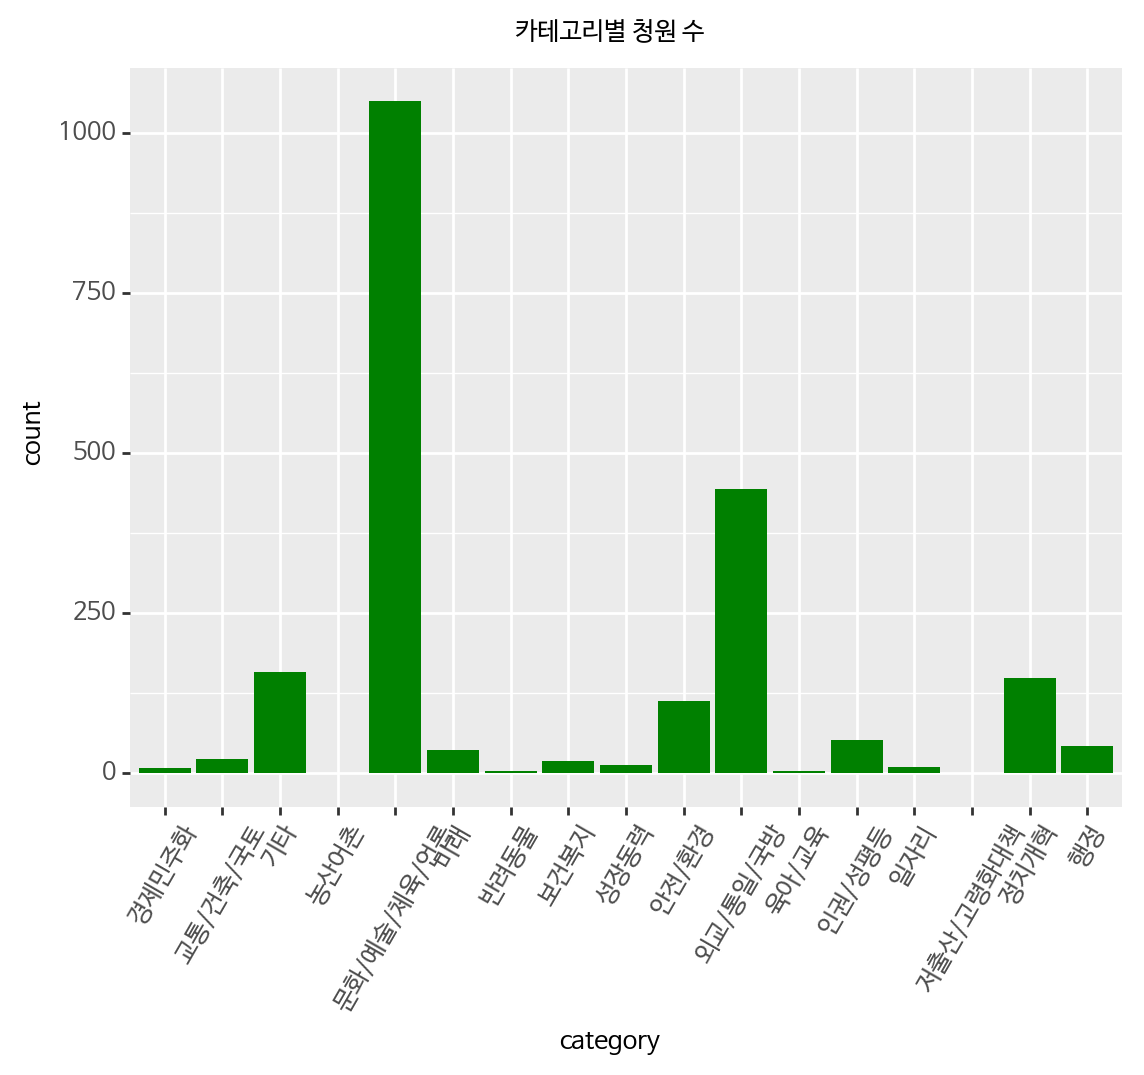

<ggplot: (8759160098529)>

In [161]:
# 카테고리별 청원 수
(ggplot(pc2018)
 + aes('category')
 + geom_bar(fill='green')
 + ggtitle('카테고리별 청원 수')
 + theme(text=element_text(fontproperties=font),
        axis_text_x=element_text(rotation=60))
)

참고로 theme 이하의 옵션을 지워버리면 한글이 깨져서 나옴을 확인할 수 있다.

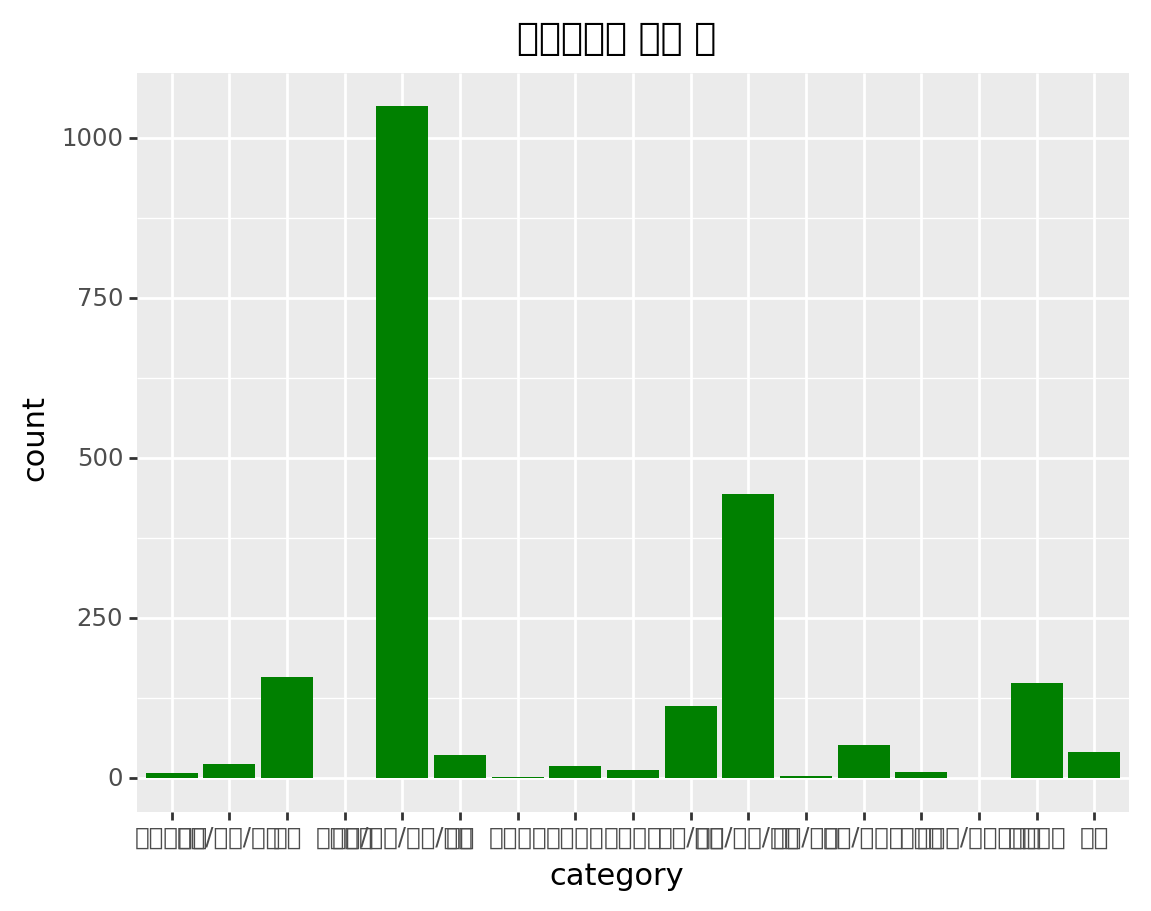

<ggplot: (8759158626140)>

In [162]:
# 카테고리별 청원 수
(ggplot(pc2018)
 + aes('category')
 + geom_bar(fill='green')
 + ggtitle('카테고리별 청원 수')
)

그러므로 Colab에서의 한글 폰트 깨짐을 방지하기 위해 주의하자(! _ !)

외에도 카테고리별로 투표수를 그래프로 확인할 수 있으며, aes에 옵션을 바꾸어 x축을 바꾸어줄 수도 있다.

### 차트 속 색 바꾸기


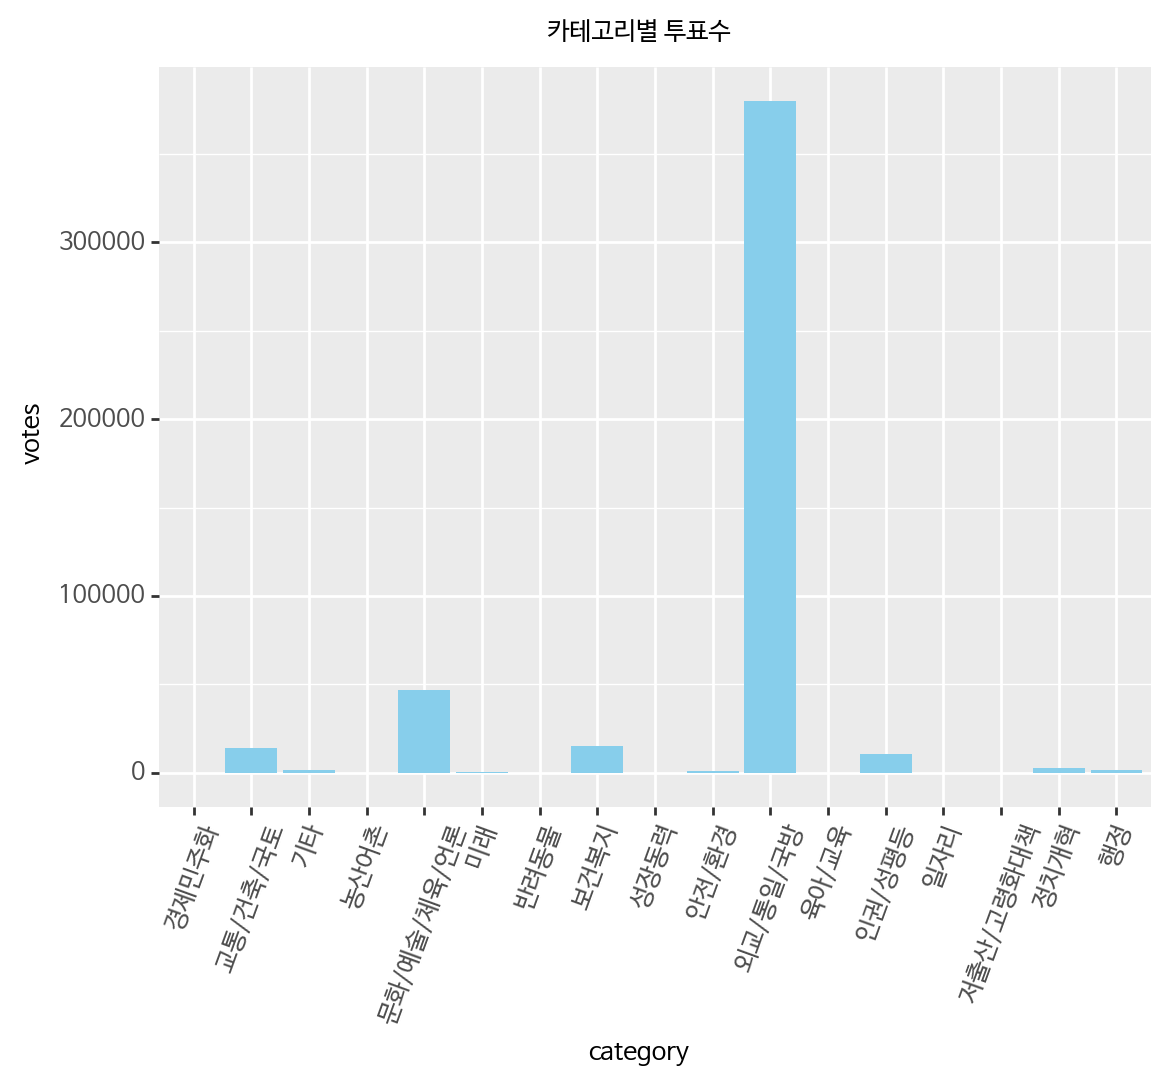

<ggplot: (8759158597026)>

In [163]:
# 카테고리별 투표수
(ggplot(pc2018)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + theme(text=element_text(fontproperties=font),
        axis_text_x=element_text(rotation=70))
)

위의 그래프는 앞선 그래프와 달리 바(bar)의 색이 달라졌다. 이는 HTML 컬러코드를 통해 쉽게 바꾸어줄 수 있다. 다음 [사이트](https://html-color-codes.info/Korean/)에서 컬러 차트나 픽커를 이용해 원하는 색을 고르고 이를 geom_col에 채워주면 된다.

### x축과 y축 바꿔주기
만약 그래프를 가로로 수치가 늘어나게 보고 싶다면 x축과 y축을 바꾸어주면 된다. 이는 `coord_flip`을 활용한다.

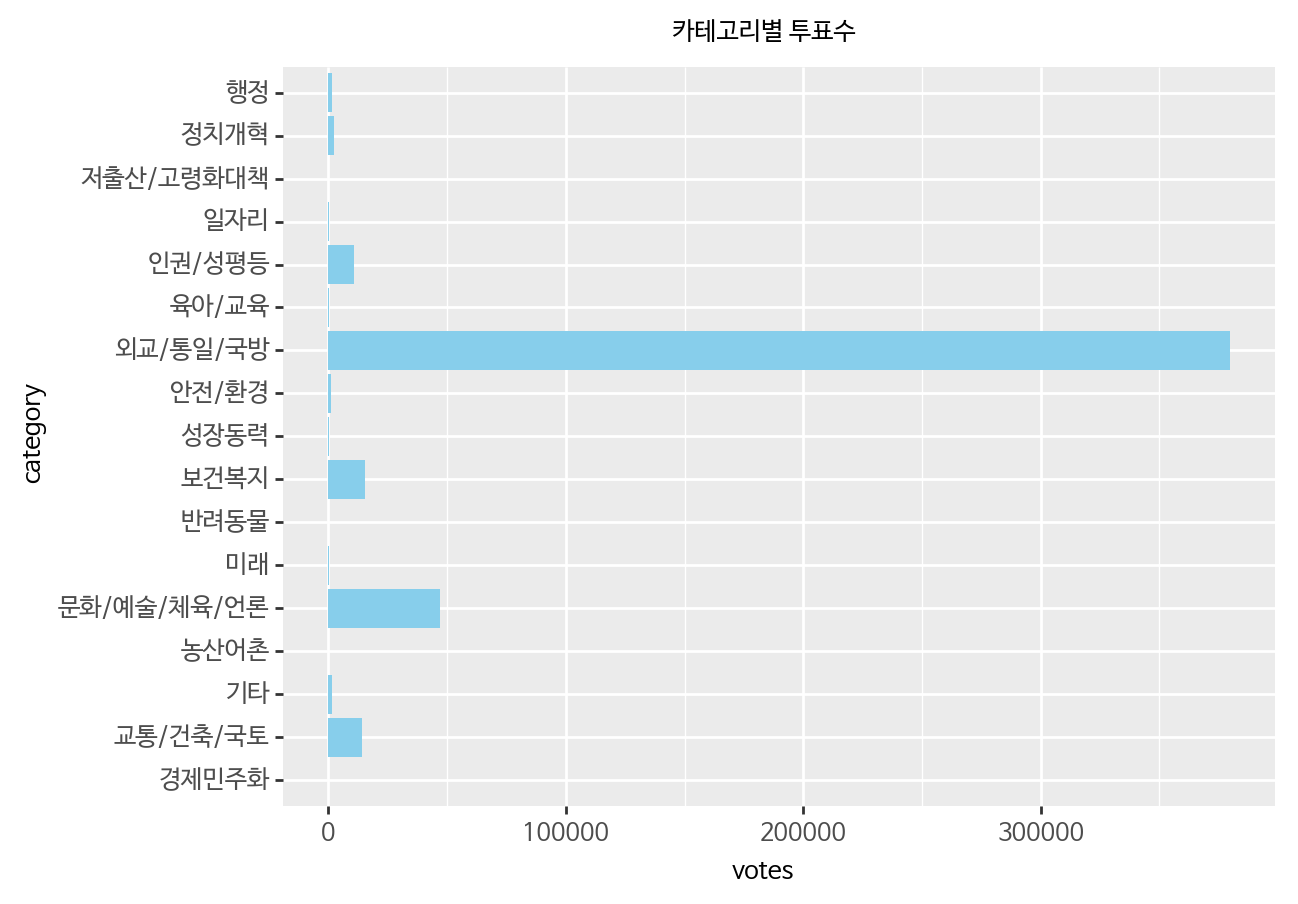

<ggplot: (-9223363277695677233)>

In [164]:
# coord_flip을 사용해서 x축과 y축을 바꿔본다.
(ggplot(pc2018)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + coord_flip()
 + theme(text=element_text(fontproperties=font))
)

### 카테고리별 답변 대상 청원수 그래프
카테고리별 답변 대상 청원을 다양한 방법으로 표현해보자.

가장 먼저, 아래의 그래프는 카테고리별로 청원의 투표수에 따라 점을 찍고 그 점의 색상으로 답변의 수를 표현한다.

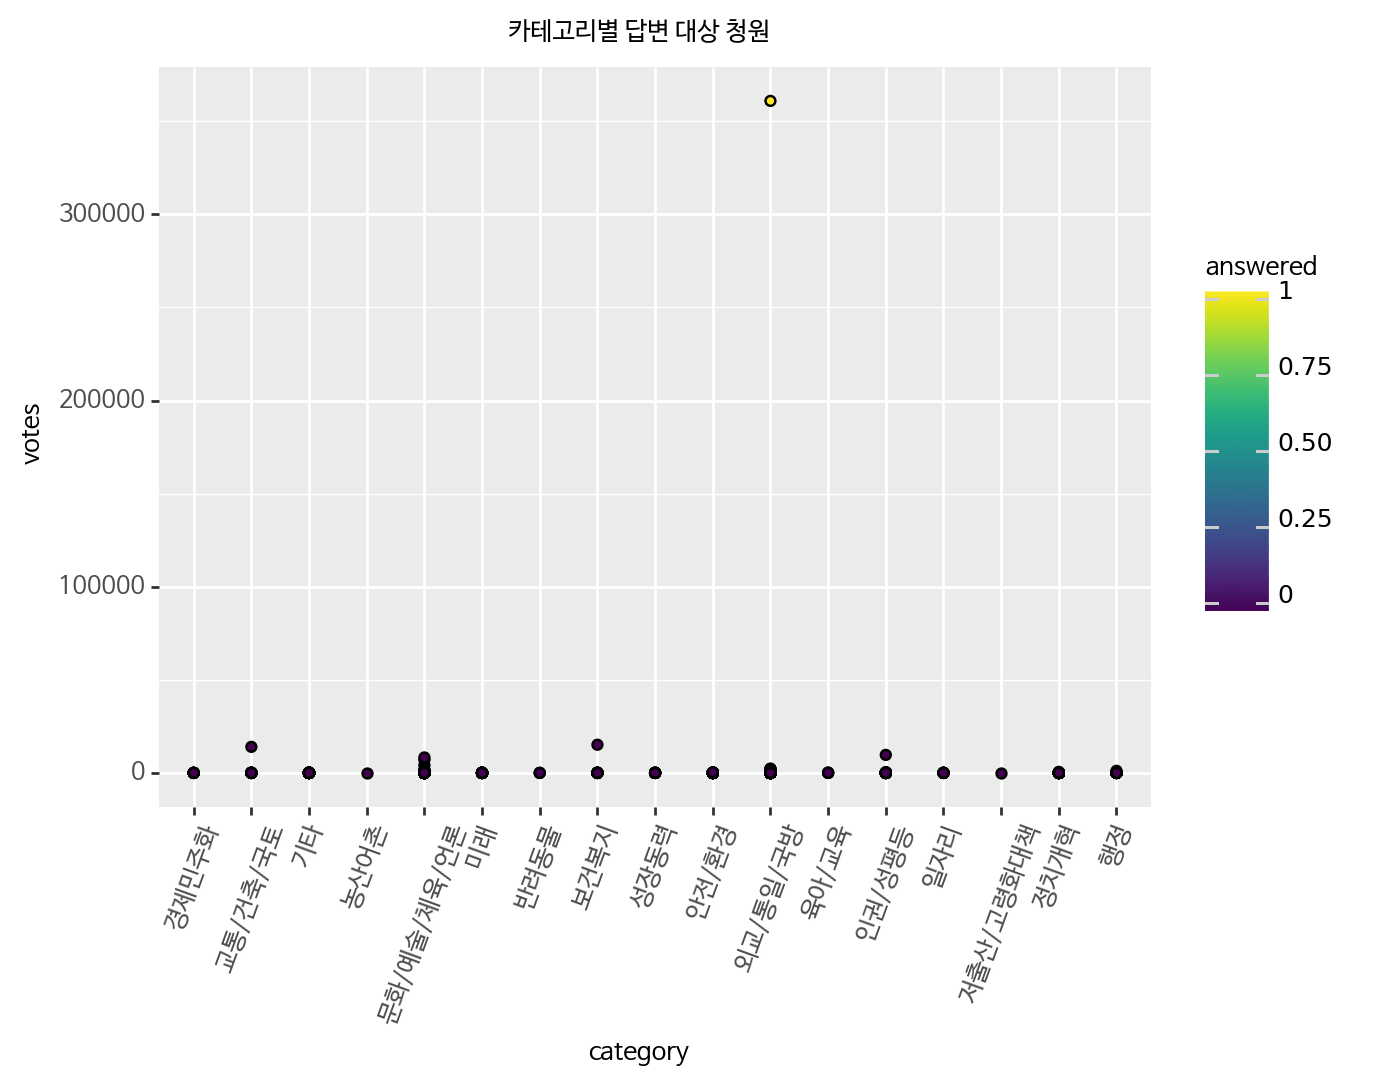

<ggplot: (8759159509000)>

In [165]:
(ggplot(pc2018) 
 + aes(x='category', y='votes', fill='answered')
 + geom_point()
 + ggtitle('카테고리별 답변 대상 청원')
 + theme(text=element_text(fontproperties=font),
        axis_text_x=element_text(rotation=70))
)

다음으로, 아래의 그래프는 카테고리별로 청원의 투표수를 bar chart로 표현하고 바의 색상으로 답변의 수를 표현한다.

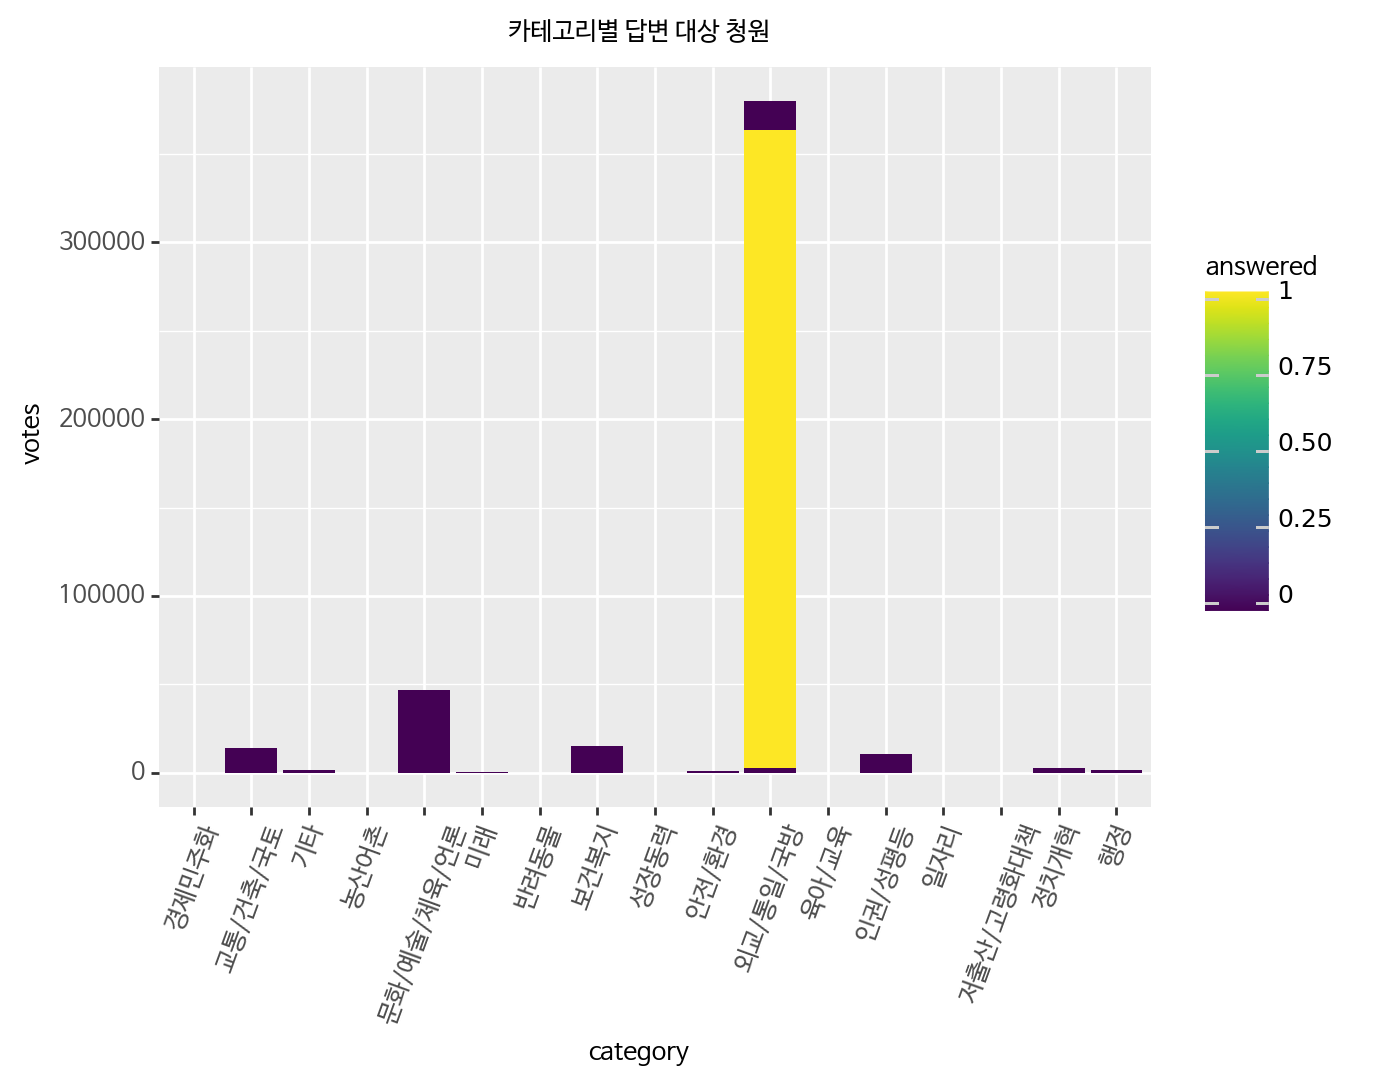

<ggplot: (-9223363277695476038)>

In [166]:
(ggplot(pc2018, aes(x='category', y='votes', fill='answered'))
 + geom_col()
 + ggtitle('카테고리별 답변 대상 청원')
 + theme(text=element_text(fontproperties=font),
        axis_text_x=element_text(rotation=70))
)

### 연도/월별 청원수 그래프
국민 청원이 시작된 2016년 5월부터 2018년 5월까지를 1년 단위로 나누어 연도별 청원수를 그래프로 나타내본다.

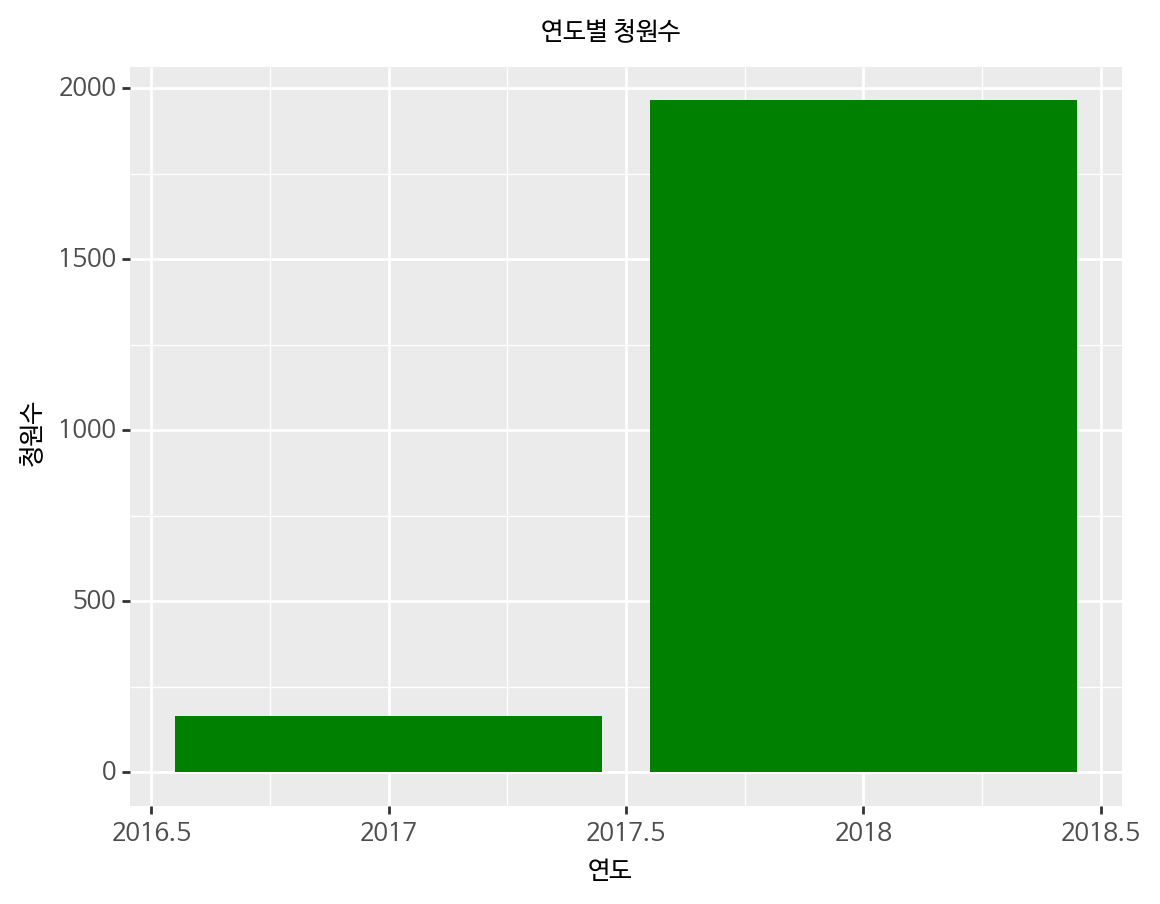

<ggplot: (-9223363277695264375)>

In [181]:
(ggplot(pc2018)
 + aes('start_year')
 + geom_bar(fill='green')
 + labs(y='청원수', x='연도', title='연도별 청원수')
 + theme(text=element_text(fontproperties=font))
)

평창 동계 올림픽이 가까워 올수록 청원수가 확연히 늘어남을 알 수 있다. 월별 청원수 역시 올림픽이 개최된 2, 3월 전후로 청원이 몰려있음을 아래 그래프로 알 수 있다.

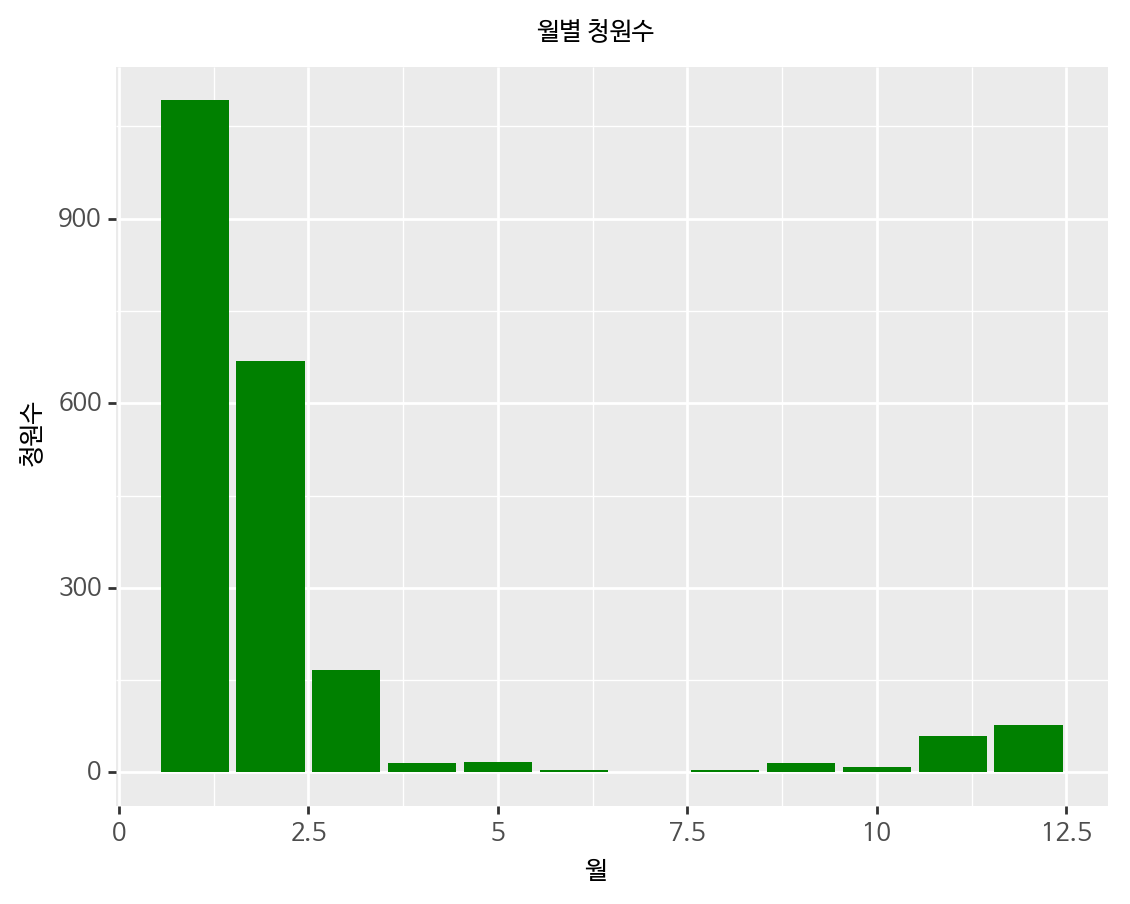

<ggplot: (8759159458301)>

In [168]:
(ggplot(pc2018)
 + aes('start_month')
 + geom_bar(fill='green')
 + labs(y='청원수', x='월', title='월별 청원수')
 + theme(text=element_text(fontproperties=font))
)

### 일자별 청원수
가장 청원이 많았던 1월의 청원 데이터를 조금 더 알아보자. 우선 상위 3개 날짜를 확인해본다.

In [169]:
# 1월에 청원이 특히 많은데 상위 3개 날짜만 뽑아보자
pc2018_1 = pc2018.loc[pc2018['start_month'] == 1]
pc2018_1['start_day'].value_counts()[:3]

23    142
24    100
17     91
Name: start_day, dtype: int64

그렇다면 청원이 많이 올라온 1월 23, 24일에는 어떤 내용의 청원이 올라온 것일까?

이럴때는 그 날의 데이터만 제한하여 데이터프레임을 새로 만들어 처리해주면 좋다. 다음은 이틀간 올라온 청원 중 투표수에 따라 20개만 추출했다.

In [177]:
pc2018_1_sample = pc2018_1.loc[(pc2018_1['start_day'] == 23) | (pc2018_1['start_day'] == 24)]
pc2018_1_sample[['title', 'content', 'votes']].sort_values(by='votes', ascending=False)[:20]

,title,content,votes
95678,올림픽 개/폐막식 공연자를 재정해주십시오.,우리나라에서 동계 올림픽이 열리기까지 정말 많은 사람들의 노력과 땀이 들어갔습니다....,7064
95599,국민청원 20만명이 넘은 나경원 평창올림픽 위원직 자진 사퇴를 촉구합니다,<나경원 의원 평창올림픽 위원직 파면 국민청원> 이 불과 며칠 만에 20만명을 넘겼...,2131
95437,'나경원 의원 평창올림픽 위원직을 파면시켜주세요'를 간절히 요원합니다~!,나경원 의원 평창올림픽 위원직을 파면시켜주세요\n를 간절히 소원합니다.,361
95555,나경원 평창올림픽위원 파면,나경원. 평창올림픽위원직 파면을 청원합니다,226
95488,나경원 의원 평창 올림픽 위원직 파면,나경원 의원의 평창 올림픽 위원직 파면을 청원합니다.\n올림픽 위원 자격으로 왜 저...,195
95650,나경원 의원 올림픽조직위원에서 제외 시켜주십시오.,민족의 큰 일이며 세계인의 평화축전인 동계올림픽을 자유한국당의 정치적인 이유로 폄...,170
94819,평창올림픽조직위파면요구,나경원 한국당의원 평창올림픽조직위원 파면요구,135
95399,나경원 평창 올림픽 위원 자격 박탈해주세요.,언제까지 북한을 이용해서 국민을 이간질 시키려합니까..\n축제인 올림픽을 위원장이 ...,125
94810,나경원의원 평창올림픽위원직 사퇴,한반도 통일과. 우리민족이 하나가되며 분단의 비극을 딛고 무궁한 발전이 이루어질수 ...,119
96131,평창올림픽 한반도기 독도추가,안녕하십니까? 청원을 올리는 것은 처음이라 어떻게 말을 시작해야 될지 모르겠습니다....,117


따라서 1월 23, 24일에는 나경원 의원의 올림픽 조직위 위원 자격에 대한 논란이 있었고 이에 대한 청원이 몰렸음을 알 수 있다. 추가로 가장 많은 투표수를 받은 청원은 개/폐막식 공연자에 대한 내용이었다.

추가로 일자별 청원수를 그래프로 나타내면 다음과 같다.

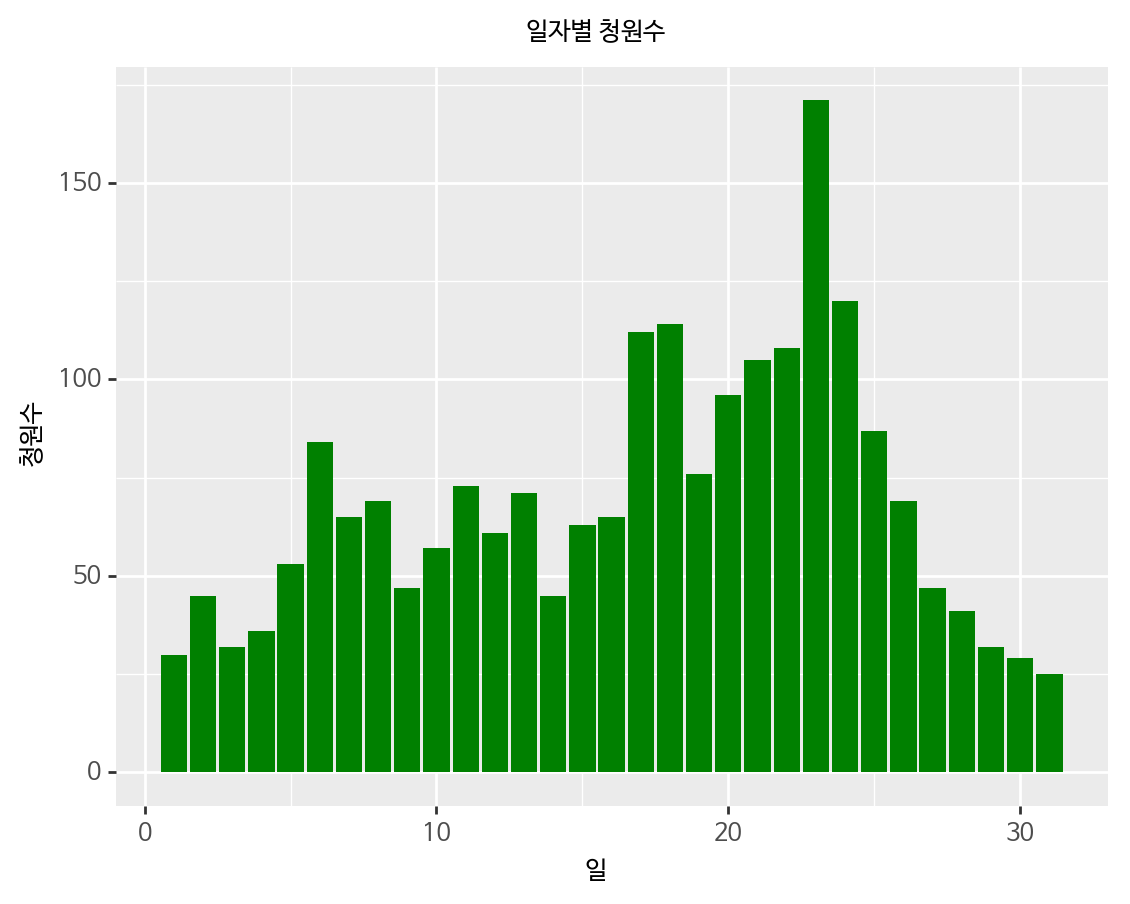

<ggplot: (8759159681449)>

In [171]:
(ggplot(pc2018)
 + aes('start_day')
 + geom_bar(fill='green')
 + labs(y='청원수', x='일', title='일자별 청원수')
 + theme(text=element_text(fontproperties=font))
)

In [172]:
# 그래프를 그리다가 컬럼명이 떠오르지 않으면 위로 올라가지 않고 바로 컬럼명을 찍어 봅니다.
pc2018.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content', 'start_year', 'start_month', 'start_day', 'start_hour',
       'start_dow', 'start_wdn', 'start_dayofweek', 'start_dayofweek_kr'],
      dtype='object')

### 요일별 청원수
요일별 청원수를 다양한 방법으로 나타내보자.

가장 먼저 기본적인 bar plot을 활용해 어떤 요일에 청원이 가장 많이 올라왔는지 확인해본다.

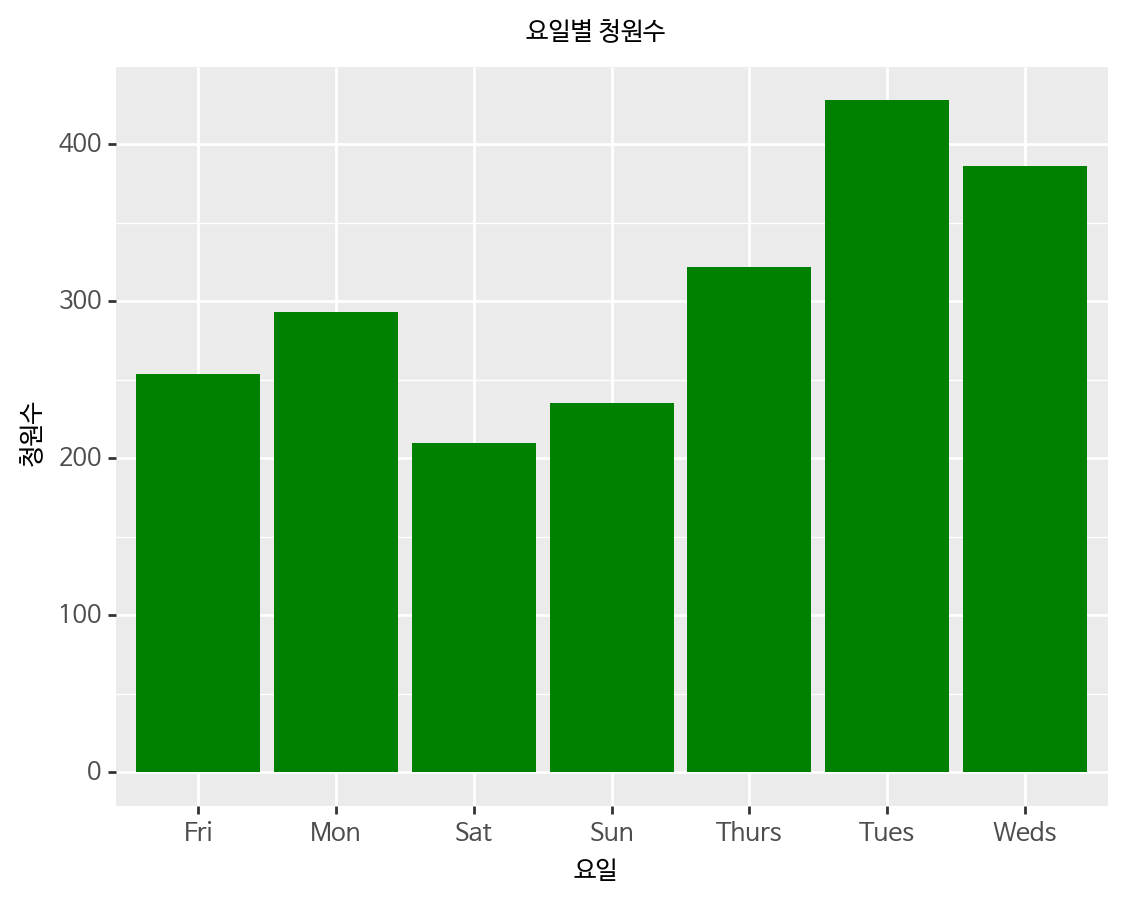

<ggplot: (-9223363277695529605)>

In [173]:
(ggplot(pc2018)
 + aes('start_dayofweek')
 + geom_bar(fill='green')
 + labs(y='청원수', x='요일', title='요일별 청원수')
 + theme(text=element_text(fontproperties=font))
)

그래프를 통해 화요일에 가장 많은 양의 청원이, 토요일에 가장 적은 양의 청원이 올라왔음을 알 수 있다. 이는 앞서 시계열 데이터에서 확인한 바와 같다. 

아래는 카테고리별로 어떤 요일에 청원이 많이 발생했는지를 확인해볼 수 있게 박스플롯을 추가한 그래프이다.

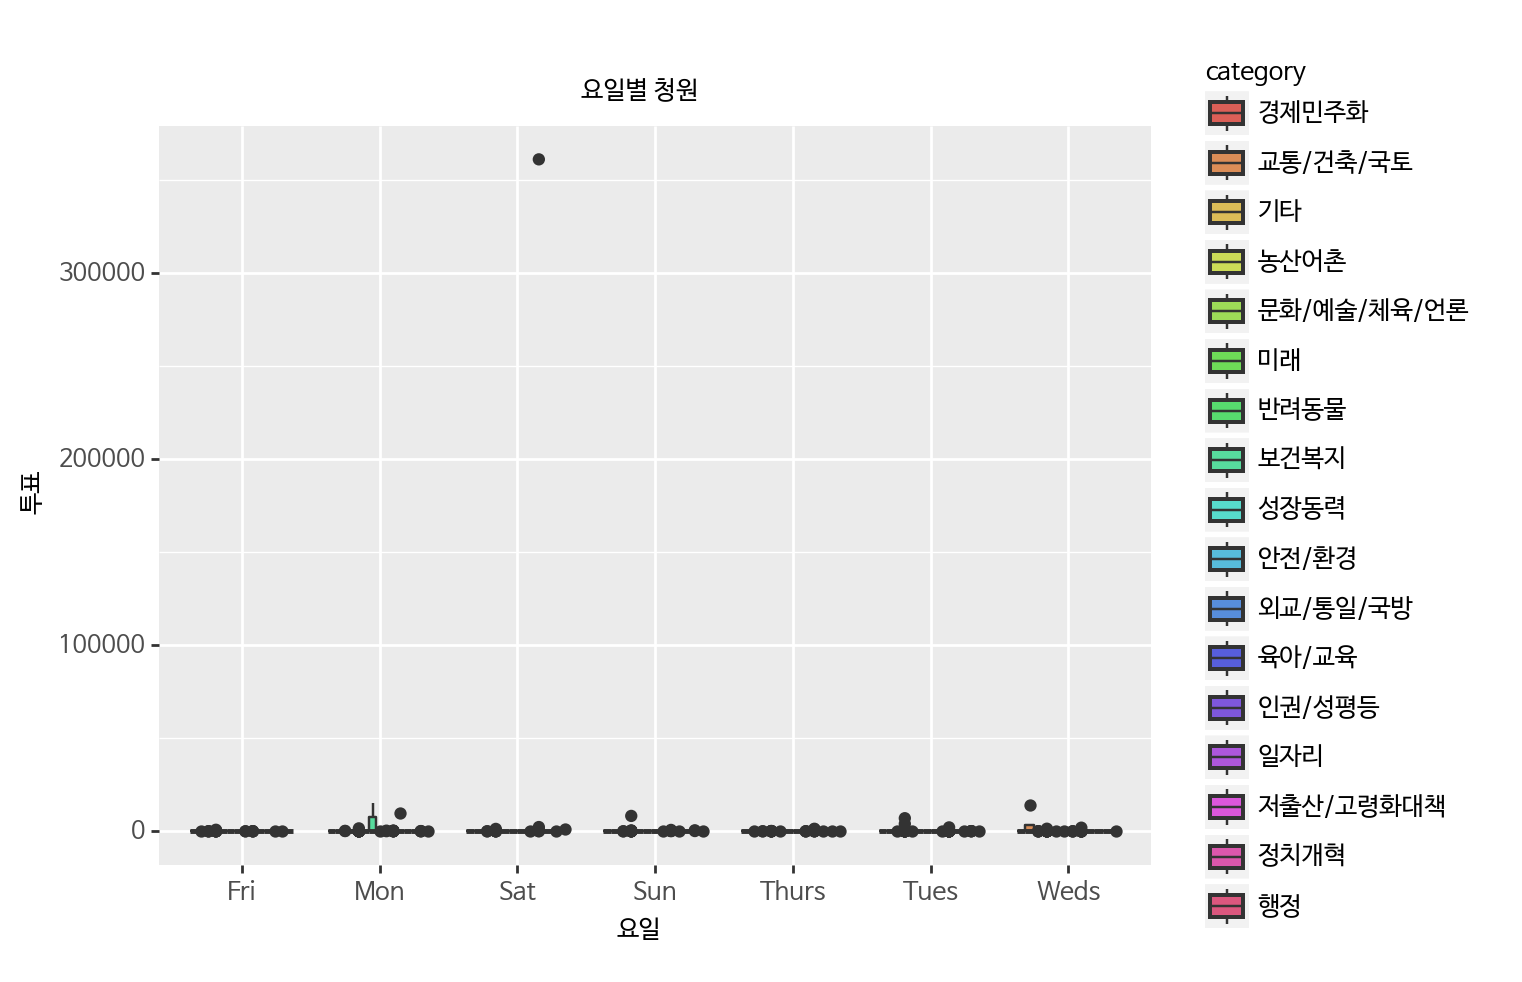

<ggplot: (-9223363277695076804)>

In [174]:
# 박스플롯을 그려볼까요?
(ggplot(pc2018, aes(x='start_dayofweek', y='votes', fill='category'))
 + geom_boxplot()
 + labs(y='투표', x='요일', title='요일별 청원')
 + theme(text=element_text(fontproperties=font))
)

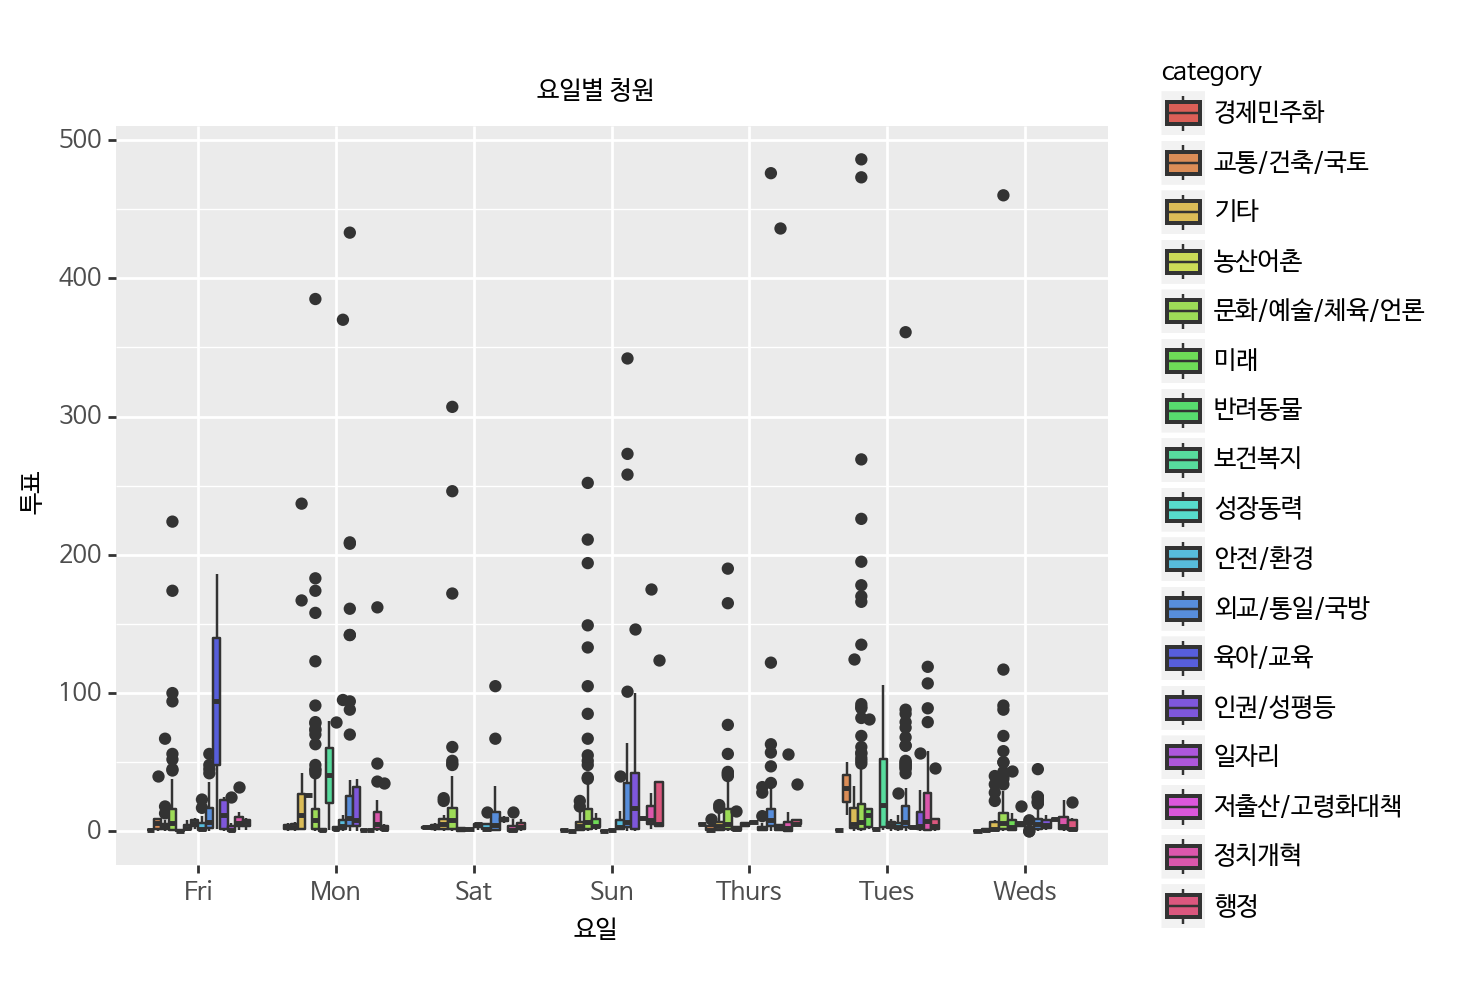

<ggplot: (8759159678328)>

In [176]:
# 그래프를 좀 더 자세하게 보기 위해 투표수가 특정 건 이하인 데이터만 모아본다.
pc2018_votes_25000 = pc2018.loc[pc2018['votes'] < 1000]

(ggplot(pc2018_votes_25000, aes(x='start_dayofweek', y='votes', fill='category'))
 + geom_boxplot()
 + labs(y='투표', x='요일', title='요일별 청원')
 + theme(text=element_text(fontproperties=font))
)

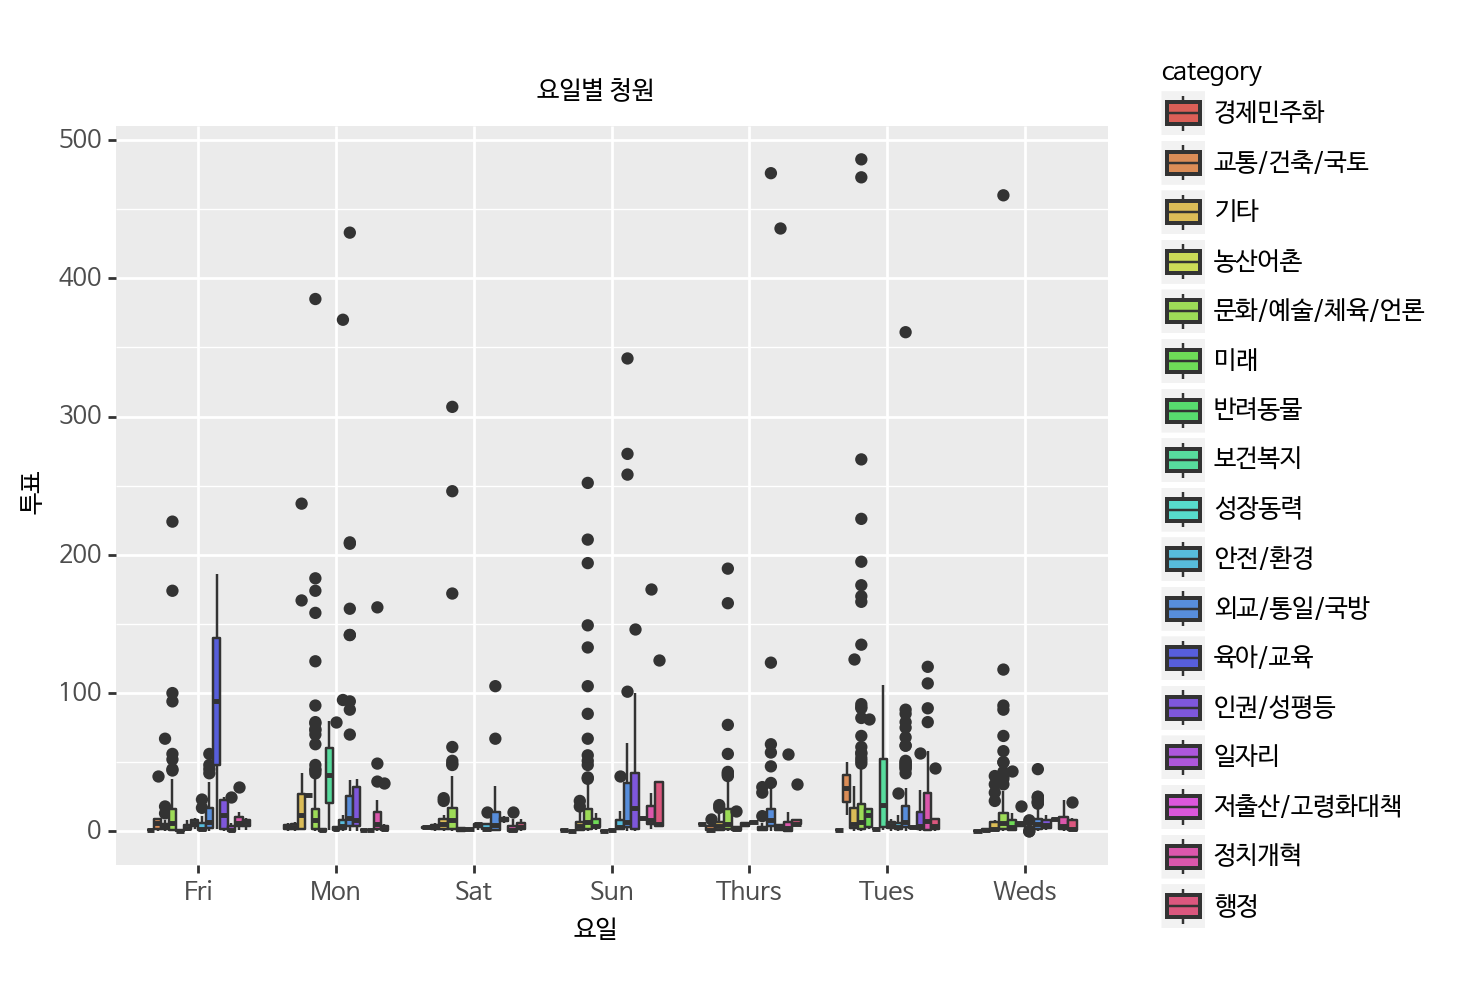

<ggplot: (8759160397909)>

In [182]:
# 그래프를 좀 더 자세하게 보기 위해 투표수가 특정 건 이하인 데이터만 모아본다.
pc2018_votes_500 = pc2018.loc[pc2018['votes'] < 500]

(ggplot(pc2018_votes_500, aes(x='start_dayofweek', y='votes', fill='category'))
 + geom_boxplot()
 + labs(y='투표', x='요일', title='요일별 청원')
 + theme(text=element_text(fontproperties=font))
)

위 그래프는 건 수를 줄여줄 수록 보다 상세하게 확인할 수 있다.